In [1]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np



In [17]:
# Import data 

df = pd.read_csv("../data/ufo_data_nuforc.csv")

df['duration'] = df['duration'].str.replace(r'[-.]', ' ')
# drop NaN values from the 'duration' column
df = df.dropna(subset=['duration'])


/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/3796397136.py:3: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/3796397136.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [18]:
# Clean duration column 

import re

# define regular expression patterns to extract duration information
pattern_minutes = re.compile(r'(\d+[\.\d]*)\s*(min|mins|minutes)', re.IGNORECASE)
pattern_seconds = re.compile(r'(\d+[\.\d]*)\s*(sec|secs|seconds)', re.IGNORECASE)
pattern_hours = re.compile(r'(\d+[\.\d]*)\s*(hr|hrs|hours)', re.IGNORECASE)

# loop over rows of the dataframe
for index, row in df.iterrows():
    # extract duration information from the 'duration' column using regular expressions
    matches_minutes = pattern_minutes.findall(row['duration'])
    matches_seconds = pattern_seconds.findall(row['duration'])
    matches_hours = pattern_hours.findall(row['duration'])
    
    # keep only the last duration element found in the row
    duration = ''
    if matches_minutes:
        duration = matches_minutes[-1][0] + ' minutes'
    elif matches_seconds:
        duration = matches_seconds[-1][0] + ' seconds'
    elif matches_hours:
        duration = matches_hours[-1][0] + ' hours'
    
    # update the 'duration' column with the cleaned duration value
    df.at[index, 'duration'] = duration

# drop rows that don't have any number in the 'duration' column
df = df[df['duration'].str.contains(r'\d')]


In [19]:
# Convert duration column to numeric values (minutes scale)

df= df.reset_index()

# Create a new column for that 

df['Minutes'] = ''

for i in range(0,len(df)):
    try:
        duration = df['duration'][i].split()

        if duration[1][0] == 's':
            scaler = 1/60
        elif duration[1][0] == 'm':
            scaler = 1
        else:
            scaler = 60

        minutes = int(duration[0]) * scaler
        df.at[i, 'Minutes'] = minutes
    except:
        df.drop(i, inplace=True)

df

    

,index,posted,date,time,city,state,shape,duration,summary,images,Minutes
0,0,12/22/22,12/22/22,09:29:00,Newark,DE,Light,30 seconds,I saw a light that was not flashing moving the...,NaN,0.5
1,1,12/22/22,12/21/22,21:33:00,Columbus,OH,Light,2 minutes,4-5 orange balls of light in a straight line,NaN,2
2,2,12/22/22,12/21/22,04:11:00,Franklin,ME,Light,2 hours,Hovering bright light with satellite lights ex...,NaN,120
3,3,12/22/22,12/20/22,23:30:00,East Greenwich,RI,Light,3 seconds,I was driving the interstate at night with my ...,NaN,0.05
4,5,12/22/22,12/20/22,02:30:00,Washington DC,WA,Triangle,2 minutes,"Object hovering 1-2 minutes, then disappeared ...",NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
99212,117823,03/07/98,08/15/79,22:10:00,Beach Haven Terrace (Long Beach Island),NJ,Fireball,5 seconds,"Fireball flying parellel with the horizen,then...",NaN,0.083333
99213,117824,03/07/98,07/01/79,03:00:00,Chico,CA,Rectangle,7 minutes,"A huge solid black mass, silently glided direc...",NaN,7
99214,117825,03/07/98,12/20/78,17:00:00,Huntington Park,CA,Disk,20 minutes,"My Father and I watched a silver object, shape...",NaN,20
99215,117827,03/07/98,08/01/73,04:00:00,Kittery,ME,Formation,10 seconds,A VERY fast light point object that was viewed...,NaN,0.166667


<AxesSubplot: >

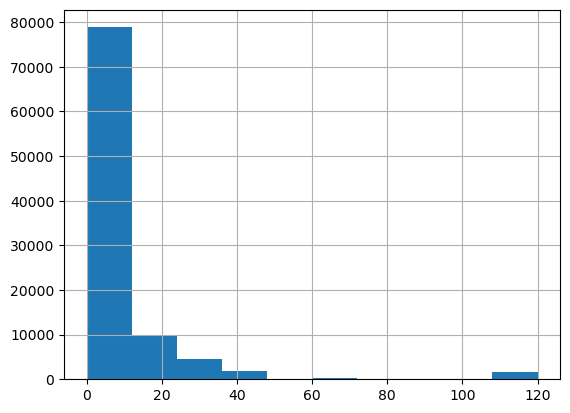

In [20]:
# Get a sense of distribution

# Remove all sightings greater than 2 hrs (outliers)
df = df[df['Minutes'] <= 120]

df['Minutes'].hist()

A good way to partition the data would be:

_ Less than 20 min <br>
_ Between 20 and 60 min <br>
_ > 60 min 

In [21]:
df['Duration_slot'] = ''



/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/602099826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# create a function to map the duration to a duration slot
def map_duration(duration):
    
    if duration < 5:
        return "Less than 5 minutes"
    
    elif duration < 20:
        return "Between 5 and 20 minutes"
    elif duration < 40:
        return "Between 20 and 40 minutes"
    else:
        return "Greater than 40 minutes"

# apply the function to the 'Minutes' column
df['Duration_slot'] = df['Minutes'].apply(map_duration)


/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/3013992012.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df['Shape_slot'] = ''
#df = df.reset_index()

# create a function to map the duration to a duration slot
def map_shape(shape):
    
    if shape == 'Light':
        return "Light"
    elif shape == "Circle":
        return "Circle"
    elif shape == "Triangle":
        return "Triangle"
    elif shape == "Fireball":
        return "Fireball"
    else:
        return "Other"

# apply the function to the 'Minutes' column
df['Shape_slot'] = df['shape'].apply(map_shape)


/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/4115582749.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/4115582749.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Group by 'Duration_slot', 'Shape_slot', and 'state', and count the number of rows for each group
grouped = df.groupby(['Duration_slot', 'Shape_slot', 'state']).count().reset_index()



In [25]:
new_df = grouped[['Duration_slot' , 'Shape_slot', 'state']]

new_df

,Duration_slot,Shape_slot,state
0,Between 20 and 40 minutes,Circle,AK
1,Between 20 and 40 minutes,Circle,AL
2,Between 20 and 40 minutes,Circle,AR
3,Between 20 and 40 minutes,Circle,AZ
4,Between 20 and 40 minutes,Circle,CA
...,...,...,...
998,Less than 5 minutes,Triangle,VT
999,Less than 5 minutes,Triangle,WA
1000,Less than 5 minutes,Triangle,WI
1001,Less than 5 minutes,Triangle,WV


In [26]:
geo_info = df[['city' , 'state', 'Duration_slot']]
geo_info2 = geo_info[['city' , 'state']]
geo_info2.head()

,city,state
0,Newark,DE
1,Columbus,OH
2,Franklin,ME
3,East Greenwich,RI
4,Washington DC,WA


In [27]:
state_to_region = {
    'AL': 'South',
    'AK': 'West',
    'AZ': 'West',
    'AR': 'South',
    'CA': 'West',
    'CO': 'West',
    'CT': 'East',
    'DE': 'East',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'IA': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'ME': 'North',
    'MD': 'East',
    'MA': 'East',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MS': 'South',
    'MO': 'Midwest',
    'MT': 'West',
    'NE': 'Midwest',
    'NV': 'West',
    'NH': 'North',
    'NJ': 'East',
    'NM': 'West',
    'NY': 'East',
    'NC': 'South',
    'ND': 'Midwest',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'East',
    'RI': 'North',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VT': 'North',
    'VA': 'South',
    'WA': 'West',
    'WV': 'South',
    'WI': 'Midwest',
    'WY': 'West',
    'AS': 'Other',
    'DC': 'East',
    'FM': 'Other',
    'GU': 'Other',
    'MH': 'Other',
    'MP': 'Other',
    'PW': 'Other',
    'PR': 'Other',
    'VI': 'Other'
}


In [28]:
# map the state codes to regions and create a new column "region"
geo_info2['region'] = geo_info2['state'].map(state_to_region)


In [29]:
geo_info

,city,state,Duration_slot
0,Newark,DE,Less than 5 minutes
1,Columbus,OH,Less than 5 minutes
2,Franklin,ME,Greater than 40 minutes
3,East Greenwich,RI,Less than 5 minutes
4,Washington DC,WA,Less than 5 minutes
...,...,...,...
99212,Beach Haven Terrace (Long Beach Island),NJ,Less than 5 minutes
99213,Chico,CA,Between 5 and 20 minutes
99214,Huntington Park,CA,Between 20 and 40 minutes
99215,Kittery,ME,Less than 5 minutes


In [30]:
grouped = geo_info2.groupby(['region' , 'state']).count().reset_index()

In [31]:
grouped

,region,state,city
0,East,CT,1396
1,East,DC,100
2,East,DE,310
3,East,MA,1995
4,East,MD,1354
5,East,NJ,2122
6,East,NY,4333
7,East,PA,3705
8,Midwest,IA,917
9,Midwest,IL,3214


In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd



levels = ['state', 'region'] # levels used for the hierarchical chart
color_columns = ['city', 'city']
value_column = 'city'

def build_hierarchical_dataframe(df, levels, value_column, color_columns=None):
    """
    Build a hierarchy of levels for Sunburst or Treemap charts.

    Levels are given starting from the bottom to the top of the hierarchy,
    ie the last level corresponds to the root.
    """
    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
    for i, level in enumerate(levels):
        df_tree = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
        dfg = df.groupby(levels[i:]).sum()
        dfg = dfg.reset_index()
        df_tree['id'] = dfg[level].copy()
        if i < len(levels) - 1:
            df_tree['parent'] = dfg[levels[i+1]].copy()
        else:
            df_tree['parent'] = 'total'
        df_tree['value'] = dfg[value_column]
        df_tree['color'] = dfg[color_columns[0]] / dfg[color_columns[1]]
        df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
    total = pd.Series(dict(id='total', parent='',
                              value=df[value_column].sum(),
                              color=df[color_columns[0]].sum() / df[color_columns[1]].sum()))
    df_all_trees = df_all_trees.append(total, ignore_index=True)
    return df_all_trees


df_all_trees = build_hierarchical_dataframe(grouped, levels, value_column, color_columns)
#average_score = grouped['sales'].sum() / grouped['calls'].sum()

fig = make_subplots(1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]],)

fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    branchvalues='total',
    marker=dict(
        colors=df_all_trees['color'],
        colorscale='RdBu',
        cmid=average_score),
    hovertemplate='<b>%{label} </b> <br> Sightings: %{value}',
    name=''
    ), 1, 1)

fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    branchvalues='total',
    marker=dict(
        colors=df_all_trees['color'],
        colorscale='RdBu',
        cmid=average_score),
    hovertemplate='<b>%{label} </b> <br> Sightings: %{value}',
    maxdepth=2
    ), 1, 2)

fig.update_layout(margin=dict(t=10, b=10, r=10, l=10))
fig.show()

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/415683147.py:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/415683147.py:21: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/415683147.py:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_28356/415683147.py:34: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [33]:
# Clean duration column 

import re

# define regular expression patterns to extract duration information
pattern_minutes = re.compile(r'(\d+[\.\d]*)\s*(min|mins|minutes)', re.IGNORECASE)
pattern_seconds = re.compile(r'(\d+[\.\d]*)\s*(sec|secs|seconds)', re.IGNORECASE)
pattern_hours = re.compile(r'(\d+[\.\d]*)\s*(hr|hrs|hours)', re.IGNORECASE)

# loop over rows of the dataframe
for index, row in df.iterrows():
    # extract duration information from the 'duration' column using regular expressions
    matches_minutes = pattern_minutes.findall(row['duration'])
    matches_seconds = pattern_seconds.findall(row['duration'])
    matches_hours = pattern_hours.findall(row['duration'])
    
    # keep only the last duration element found in the row
    duration = ''
    if matches_minutes:
        duration = matches_minutes[-1][0] + ' minutes'
    elif matches_seconds:
        duration = matches_seconds[-1][0] + ' seconds'
    elif matches_hours:
        duration = matches_hours[-1][0] + ' hours'
    
    # update the 'duration' column with the cleaned duration value
    df.at[index, 'duration'] = duration

# drop rows that don't have any number in the 'duration' column
df = df[df['duration'].str.contains(r'\d')]

# Convert duration column to numeric values (minutes scale)

df= df.reset_index()

# Create a new column for that 

df['Minutes'] = ''

for i in range(0,len(df)):
    try:
        duration = df['duration'][i].split()

        if duration[1][0] == 's':
            scaler = 1/60
        elif duration[1][0] == 'm':
            scaler = 1
        else:
            scaler = 60

        minutes = int(duration[0]) * scaler
        df.at[i, 'Minutes'] = minutes
    except:
        df.drop(i, inplace=True)


In [34]:
geo_info = df[['city' , 'state', 'Duration_slot']]
geo_info2 = geo_info[['city' , 'state']]
geo_info2.head()

,city,state
0,Newark,DE
1,Columbus,OH
2,Franklin,ME
3,East Greenwich,RI
4,Washington DC,WA


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

levels = ['state', 'region'] # levels used for the hierarchical chart
color_columns = ['city', 'city']
value_column = 'city'

# define a color palette for the regions
region_colors = {'North': '#3E93AB', 
                 'West': '#A8DFF7', 
                 'East': '#25536D', 
                 'South': '#57899C', 
                 'Midwest': '#B5D1D4', 
                 'Other': '#2F4E48'}


def build_hierarchical_dataframe(df, levels, value_column, color_columns=None):
    """
    Build a hierarchy of levels for Sunburst or Treemap charts.

    Levels are given starting from the bottom to the top of the hierarchy,
    ie the last level corresponds to the root.
    """
    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
    state_region_map = dict(zip(df['state'], df['region'])) # create a dictionary mapping each state to its parent region
    for i, level in enumerate(levels):
        df_tree = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
        dfg = df.groupby(levels[i:]).sum()
        dfg = dfg.reset_index()
        df_tree['id'] = dfg[level].copy()
        if i < len(levels) - 1:
            df_tree['parent'] = dfg[levels[i+1]].copy()
        else:
            df_tree['parent'] = 'total'
        df_tree['value'] = dfg[value_column]
        if level == 'region':
            # assign a unique color to each region
            df_tree['color'] = [region_colors[r] for r in df_tree['id']]
        else:
            # assign the same color to each state within a region as its parent region
            df_tree['color'] = [region_colors[state_region_map[s]] for s in df_tree['id']]
        df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
    total = pd.Series(dict(id='total', parent='',
                              value=df[value_column].sum(),
                              color='white'))
    df_all_trees = df_all_trees.append(total, ignore_index=True)
    return df_all_trees



df_all_trees = build_hierarchical_dataframe(grouped, levels, value_column, color_columns)
#average_score = grouped['sales'].sum() / grouped['calls'].sum()

#fig = make_subplots(1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]],)

# Add a Sunburst trace to the figure with labels, parents, values, marker, hovertemplate, and name
fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    branchvalues='total',
    marker=dict(
        colors=df_all_trees['color'],
        colorscale='RdBu',
        cmid=average_score),
    hovertemplate='<b>%{label} </b> <br> Sightings: %{value}',
    name=''
))

# Update the domain for the Sunburst trace to set it to [0, 1] for both x and y axes
fig.update_traces(domain=dict(x=[0, 1], y=[0, 1]))

# fig.add_trace(go.Sunburst(
#     labels=df_all_trees['id'],
#     parents=df_all_trees['parent'],
#     values=df_all_trees['value'],
#     branchvalues='total',
#     marker=dict(
#         colors=df_all_trees['color'],
#         colorscale='RdBu',
#         cmid=average_score),
#         hovertemplate='<b>%{label} </b> <br> Sightings: %{value}',
#         maxdepth=2
#     ), 1, 2)

# Update the layout to set the x and y axis ranges to [-1, 1] to center the plot
fig.update_layout(xaxis=dict(range=[-1, 1]), yaxis=dict(range=[-1, 1]))
fig


In [53]:
# Save the figure to an HTML file
fig.write_html('sunburst_plot.html', auto_open=True)

In [49]:
import chart_studio.plotly as py
import chart_studio.tools as tls

username = 'tg693'
api_key = 'mvFr26LyXJcmY7jxvs1h'

tls.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename='sunburst_plot', auto_open=True)

# <iframe width="900" height="800" frameborder="0" scrolling="no" src="//plotly.com/~tg693/1.embed"></iframe>

'https://plotly.com/~tg693/1/'